# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


必要なモジュールをインポートします。

*   pandas：表データの前処理・集計に便利な型「データフレーム」を提供してくれるライブラリ
*   sklearn：Scikit-learn。pythonで機械学習を実行するために便利なモジュールを集めてあるパッケージ。今回は以下のモジュールを使用する。
> *   cluster：クラスター分析を利用する際に便利なモジュールがいくつか用意されています。今回はKMeans（KMeans法によるクラスタリングを実行してくれるメソッド）をインポートします。
*   matplotlib：pythonでグラフ描画に使われるライブラリ
*   seaborn：pythonでグラフ描画に使われるライブラリ（matplotlibより美しい）

※ 比較のため決定木用モジュールもインポートしておく

In [2]:
# pandas のインポート
import pandas as pd

# KMeans用ライブラリをインポート
from sklearn.cluster import KMeans

# グラフ描画用ライブラリ matplotlib、seaborn をインポート
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# データの読み込み

In [3]:
# 買物データを読み込む
ECSiteShopping = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/ECsiteShopping.csv")
ECSiteShopping.head()

,UserID,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2
0,U00001,0.0,0.0,0.0,0.379526,0.0,0.0,0.273581,0.0,0.0,0.0,0.212785,0.0,0.134108,22370,0.0,0.0,0.0,0.245083,0.0,0.0,0.567593,0.0,0.0,0.0,0.093662,0.0,0.093662,32030
1,U00002,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
2,U00003,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
3,U00006,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000
4,U00007,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,3000


In [4]:
# 概要を確認する
ECSiteShopping.describe()

,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2
count,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04
mean,0.009034,0.009989,0.229424,0.078974,0.006882,0.022466,0.209823,0.001211,0.112011,0.139127,0.049900,0.051471,0.079689,2.376253e+05,0.009573,0.010254,0.225526,0.077037,0.007065,0.022777,0.207638,0.001257,0.109474,0.138217,0.049606,0.049354,0.092222,2.188467e+05
std,0.053601,0.019704,0.295527,0.115633,0.023251,0.046067,0.233182,0.003853,0.181636,0.181811,0.064384,0.121083,0.219297,2.828794e+05,0.053441,0.020479,0.298160,0.116809,0.022770,0.052536,0.233984,0.004048,0.177038,0.179996,0.069280,0.124499,0.247936,2.617804e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.683000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.829500e+04
50%,0.000000,0.000000,0.000000,0.020724,0.000000,0.000000,0.129102,0.000000,0.005054,0.080611,0.029574,0.000000,0.005435,1.067350e+05,0.000000,0.000000,0.000000,0.006283,0.000000,0.000000,0.122584,0.000000,0.003085,0.079783,0.027464,0.000000,0.006245,9.867500e+04
75%,0.000000,0.015794,0.480567,0.137031,0.000000,0.024151,0.360385,0.000000,0.143519,0.189475,0.074679,0.000000,0.040052,3.609950e+05,0.000000,0.015368,0.479538,0.132632,0.000000,0.017818,0.366170,0.000000,0.143157,0.187352,0.074531,0.000000,0.036470,3.305050e+05
max,0.994378,0.358044,1.000000,1.000000,0.935223,0.910516,1.000000,0.071713,1.000000,1.000000,1.000000,0.845701,1.000000,1.331570e+06,0.986804,0.312635,0.992696,1.000000,0.422199,1.000000,1.000000,0.087156,1.000000,1.000000,1.000000,1.000000,1.000000,1.312090e+06


# データの準備
* このケースでは標準化は行わない（全て同じ尺度であるため）が、尺度が異なる変数を使ってクラスタリングを行う際は、何かしらのスケーリング（例：標準化）を行う事が好ましい。

In [5]:
# 利用する変数を取得（今回は上半期データを利用）
columnList = ["Appliances_1","Comic_1","Computer_1","Foods_1","Game_1","Hobby_1","Kitchen_1","Magazine_1","Movie_1","Music_1","Pharmaceuticals_1","Sports_1","Subscription_1"]
X = ECSiteShopping.loc[:,columnList]

# KMeans法によるクラスタリング
*   n_clusters：クラスターの数を指定します。
*   max_iter：（何度か計算をして再現性のチェックをしてアウトプットするのですが）計算の回数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [6]:
# KMeans法を実施し、クラスターを構築する
clf = KMeans(n_clusters=4, max_iter=10, random_state=1234)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [7]:
# クラスター番号を付与
X["Cluster"] = clf.predict(X)

In [8]:
# クラスター毎の件数を数える
X["Cluster"].value_counts()

1    5171
0    4661
2    2788
3     688
Name: Cluster, dtype: int64

In [1]:
# クラスター毎の特徴を読み取る
plt.figure(figsize=(15,6))
sns.heatmap(X.groupby("Cluster").mean(), annot=True, cmap="summer");

NameError: name 'plt' is not defined

# 指標に基づくクラスター数の検討（エルボー法）

Text(0, 0.5, 'Distortion')

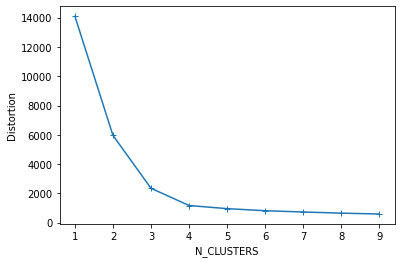

In [10]:
# エルボー法によりクラスター数の検討を行う
dist_list = []
for i in range(1,10):
  clf = KMeans(n_clusters=i, max_iter=10, random_state=1234)
  clf.fit(X)
  dist_list.append(clf.inertia_)

# グラフ化
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('N_CLUSTERS')
plt.ylabel('Distortion')